# Proyecto final Telemática

Primero que cualquier otra cosa revisaremos la tabla de hosts que nos dan, aunque debemos
reorganizarlas de mayor a menor, esto para facilitar el proceso de VLSM.

Ahora bien, como podemos ver en las siguientes imágenes lo organizamos de mayor a menor, y sabemos
que necesitaremos **450 hosts** totales.

La cantidad de hosts que necesitamos es 450


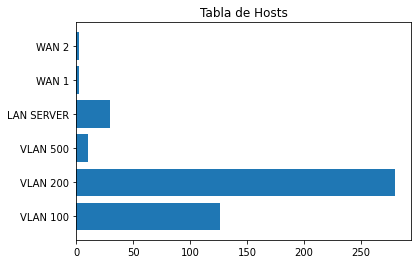

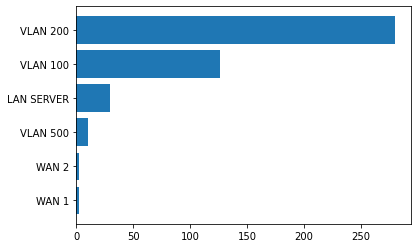

In [15]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create a data frame
df = pd.DataFrame({
    'Group':  ['VLAN 100', 'VLAN 200', 'VLAN 500', 'LAN SERVER', 'WAN 1', 'WAN 2'],
    'Value': [126, 280, 10, 30, 2, 2]
})

print("La cantidad de hosts que necesitamos es", df['Value'].sum())

# Add title
plt.title('Tabla de Hosts')

# Create horizontal bars
plt.barh(y=df.Group, width=df.Value)
plt.show()

# Sort the table
df = df.sort_values(by=['Value'])

# Create horizontal bars
plt.barh(y=df.Group, width=df.Value)
plt.show()


Con esta información brindada podemos deducir que necesitaremos una red de **Clase B**.

| Mask | Subnet mask | Hosts disponibles |
|---|---|---|
| /22 | 255.255.252.0 | 1022 |

Entonces usemos como IP base `192.100.0.0/22`, realizando el proceso de VLSM obtendríamos algo como
esto:

| Subnet | Name | Needed Size | Allocated Size | Address Mask | Dec Mask | Assignable Range | Broadcast |
|---|---|---|---|---|---|---|---|
| VLAN 200 | 280 | 510 | 192.100.0.0 | /23 | 255.255.254.0 | 192.100.0.1 - 192.100.1.254 | 192.100.1.255 |
| VLAN 100 | 126 | 126 | 192.100.2.0 | /25 | 255.255.255.128 | 192.100.2.1 - 192.100.2.126 | 192.100.2.127 |
| LAN SERVER | 30 | 30 | 192.100.2.128 | /27 | 255.255.255.224 | 192.100.2.129 - 192.100.2.158 | 192.100.2.159 |
| VLAN 500 | 10 | 14 | 192.100.2.160 | /28 | 255.255.255.240 | 192.100.2.161 - 192.100.2.174 | 192.100.2.175 |
| WAN 2 | 2 | 2 | 192.100.2.176 | /30 | 255.255.255.252 | 192.100.2.177 - 192.100.2.178 | 192.100.2.179 |
| WAN 1  | 2 | 2 | 192.100.2.180 | /30 | 255.255.255.252 | 192.100.2.181 - 192.100.2.182 | 192.100.2.183 |